In [ ]:
pip install seaborn


Estadístico F: 13.100705825460006
Valor p: 2.475296385714899e-193


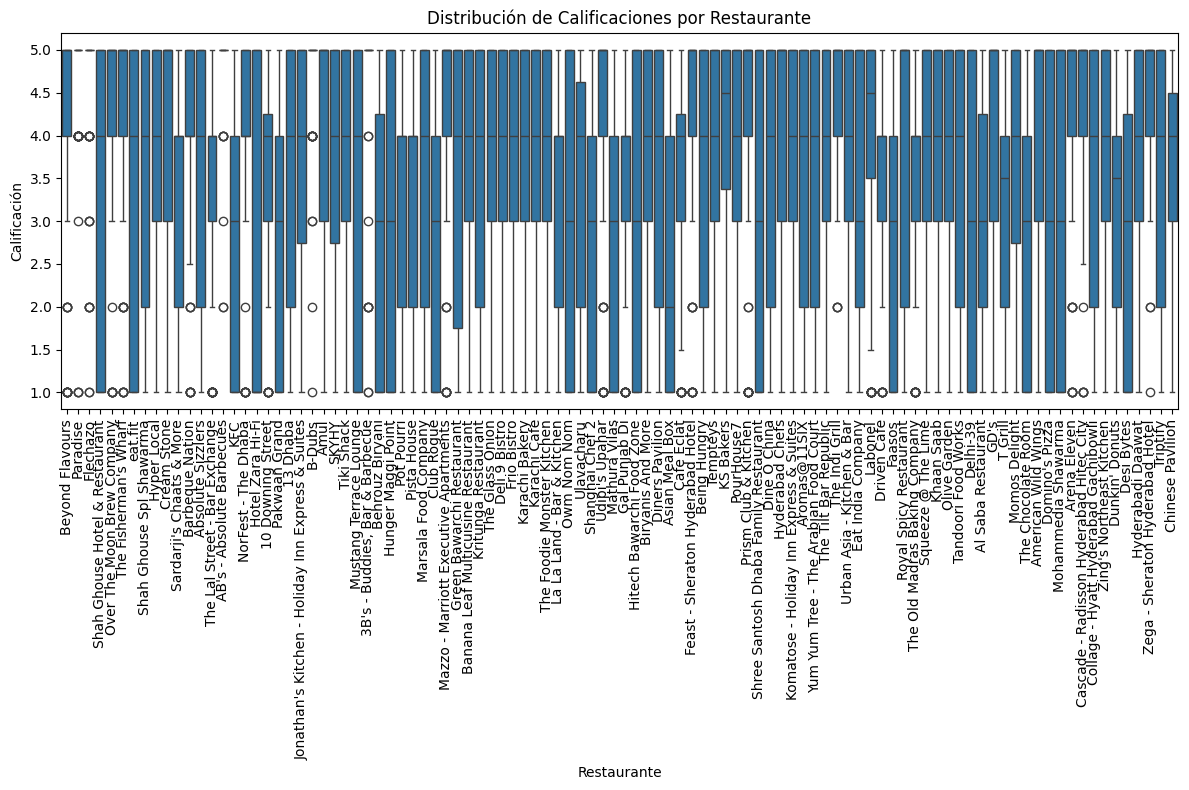

In [5]:
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar datos desde Restaurant Scrapped.csv
data = pd.read_csv('Restaurant Scrapped.csv')

# Verificar si hay valores nulos en la columna 'Rating' y eliminarlos si existen
data = data.dropna(subset=['Rating'])

# Asegurarse de que la columna 'Rating' sea de tipo numérico
data['Rating'] = pd.to_numeric(data['Rating'], errors='coerce')

# Eliminar cualquier fila donde 'Rating' no se pudo convertir a numérico
data = data.dropna(subset=['Rating'])

# Agrupar los datos por restaurante y convertir las calificaciones en listas
grouped_data = data.groupby('Restaurant')['Rating'].apply(list)

# Filtrar grupos con al menos 2 calificaciones para la prueba ANOVA
filtered_groups = [ratings for ratings in grouped_data if len(ratings) > 1]

# Verificar si tenemos suficientes grupos para realizar la prueba ANOVA
if len(filtered_groups) > 1:
    # Realizar la prueba ANOVA
    anova_result = stats.f_oneway(*filtered_groups)

    # Mostrar el resultado de la prueba ANOVA
    print('Estadístico F:', anova_result.statistic)
    print('Valor p:', anova_result.pvalue)

    # Crear un gráfico de caja para visualizar las calificaciones por restaurante
    plt.figure(figsize=(12, 8))
    sns.boxplot(x='Restaurant', y='Rating', data=data)
    plt.title('Distribución de Calificaciones por Restaurante')
    plt.xlabel('Restaurante')
    plt.ylabel('Calificación')
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()
else:
    print("No hay suficientes grupos con más de una calificación para realizar la prueba ANOVA.")


Estadístico F: 25.999412584305507
Valor p: 5.088240818855085e-82


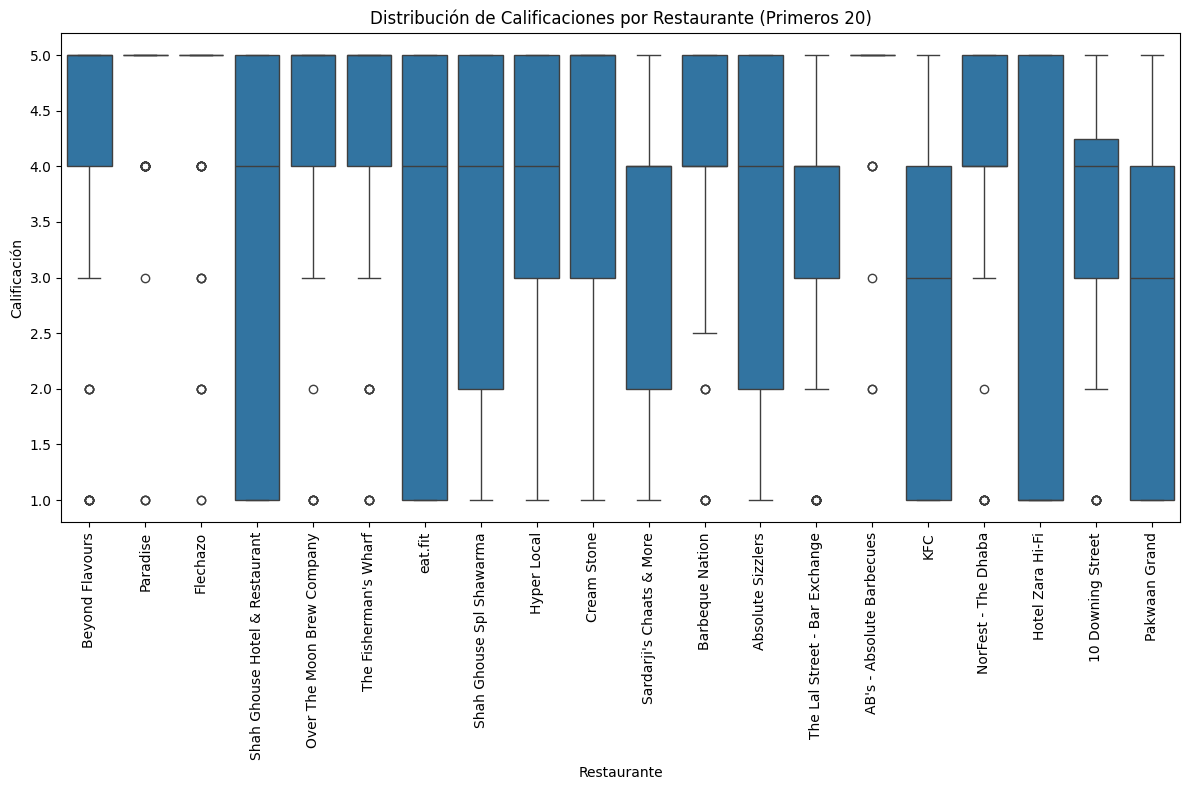

In [6]:
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar datos desde Restaurant Scrapped.csv
data = pd.read_csv('Restaurant Scrapped.csv')

# Verificar si hay valores nulos en la columna 'Rating' y eliminarlos si existen
data = data.dropna(subset=['Rating'])

# Asegurarse de que la columna 'Rating' sea de tipo numérico
data['Rating'] = pd.to_numeric(data['Rating'], errors='coerce')

# Eliminar cualquier fila donde 'Rating' no se pudo convertir a numérico
data = data.dropna(subset=['Rating'])

# Filtrar solo los primeros 20 restaurantes
first_20_restaurants = data['Restaurant'].unique()[:20]
data_filtered = data[data['Restaurant'].isin(first_20_restaurants)]

# Agrupar los datos por restaurante y convertir las calificaciones en listas
grouped_data = data_filtered.groupby('Restaurant')['Rating'].apply(list)

# Filtrar grupos con al menos 2 calificaciones para la prueba ANOVA
filtered_groups = [ratings for ratings in grouped_data if len(ratings) > 1]

# Verificar si tenemos suficientes grupos para realizar la prueba ANOVA
if len(filtered_groups) > 1:
    # Realizar la prueba ANOVA
    anova_result = stats.f_oneway(*filtered_groups)

    # Mostrar el resultado de la prueba ANOVA
    print('Estadístico F:', anova_result.statistic)
    print('Valor p:', anova_result.pvalue)

    # Crear un gráfico de caja para visualizar las calificaciones por restaurante
    plt.figure(figsize=(12, 8))
    sns.boxplot(x='Restaurant', y='Rating', data=data_filtered)
    plt.title('Distribución de Calificaciones por Restaurante (Primeros 20)')
    plt.xlabel('Restaurante')
    plt.ylabel('Calificación')
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()
else:
    print("No hay suficientes grupos con más de una calificación para realizar la prueba ANOVA.")


In [8]:
import pandas as pd

# Cargar datos desde Restaurant Scrapped.csv
data = pd.read_csv('Restaurant Scrapped.csv')

# Verificar si hay valores nulos en la columna 'Rating' y eliminarlos si existen
data = data.dropna(subset=['Rating'])

# Asegurarse de que la columna 'Rating' sea de tipo numérico
data['Rating'] = pd.to_numeric(data['Rating'], errors='coerce')

# Eliminar cualquier fila donde 'Rating' no se pudo convertir a numérico
data = data.dropna(subset=['Rating'])

# Filtrar solo los primeros 20 restaurantes
first_20_restaurants = data['Restaurant'].unique()[:20]
data_filtered = data[data['Restaurant'].isin(first_20_restaurants)]

# Agrupar los datos por restaurante y calcular estadísticas descriptivas
stats_data = data_filtered.groupby('Restaurant')['Rating'].describe()

# Imprimir las estadísticas descriptivas para los primeros 20 restaurantes
print(stats_data)


                                count   mean       std  min  25%  50%   75%  \
Restaurant                                                                    
10 Downing Street               100.0  3.800  1.091751  1.0  3.0  4.0  4.25   
AB's - Absolute Barbecues       100.0  4.880  0.498077  2.0  5.0  5.0  5.00   
Absolute Sizzlers               100.0  3.620  1.581330  1.0  2.0  4.0  5.00   
Barbeque Nation                 100.0  4.120  1.110373  1.0  4.0  4.0  5.00   
Beyond Flavours                 100.0  4.280  1.239746  1.0  4.0  5.0  5.00   
Cream Stone                     100.0  3.845  1.520392  1.0  3.0  5.0  5.00   
Flechazo                        100.0  4.660  0.878704  1.0  5.0  5.0  5.00   
Hotel Zara Hi-Fi                100.0  2.400  1.734964  1.0  1.0  1.0  5.00   
Hyper Local                     100.0  3.640  1.487456  1.0  3.0  4.0  5.00   
KFC                             100.0  2.850  1.622910  1.0  1.0  3.0  4.00   
NorFest - The Dhaba             100.0  4.030  1.1499